# Description of the final project

## Introduction

In this project, you are going to work with the dataset based on the census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. Your goal is to predict level of income of a person: "- 50000" (means less than \$50k/year) or "50000+" (means more than \$50k/year). The data is split into train (`train.csv`) and test (`test.csv`) parts. You should use train part to train the models, and test part to estimate their final quality. The best quality on the test dataset should be your final result.

The description of the data is available here: https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

_Citation:_

* _Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._

## Detailed Task Description

The solution should have the following parts:

### [25%] 1. Data exploration

* 1.1. (8%) Which metric are you going to use to evaluate the performance of the model and why?
* 1.2. (8%) Which validation strategy are you going to use and why? Apply it to the data on the preprocessing step
* 1.3. (9%) Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions

### [25%] 2. Data preprocessing

* 2.1. (8%) Fill missing values (if there are any)
* 2.2. (9%) Properly encode categorical features. Explain your choice of methods of categorical feature encoding
* 2.3. (8%) Cluster observations and add cluster number as one of the features. Make sure that the clustering method has a good quality

### [25%] 3. Model training

* 3.1. (8%) Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)
* 3.2. (9%) Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models
* 3.3. (8%) Perform blending or stacking of the trained machine learning algorithms. Carefully tune the weights of the ensemble

### [25%] 4. Summary

* 4.1. (8%) Estimate the quality of the models and their ensemble on the test set. Describe the results. Which model is the best?
* 4.2. (8%) Interpret the best single model and the ensemble. Use at least 2 model interpretation techniques. Explain, why your models have good quality (or bad quality)
* 4.3. (9%) Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

### General Requirements

* You should provide a solution in the form of the Jupyter Notebook with code cells and markdown cells (with text)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques
* Support all your statements with calculations and plots. For instance, if you claim that the dataset does not have missing values, you need to provide the code which shows that the total number of missing values is zero

# Solution

## Download Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
columns = [
    'age',
    'class of worker',
    'detailed industry recode',
    'detailed occupation recode',
    'education',
    'wage per hour',
    'enroll in edu inst last wk',
    'marital stat',
    'major industry code',
    'major occupation code',
    'race',
    'hispanic origin',
    'sex',
    'member of a labor union',
    'reason for unemployment',
    'full or part time employment stat',
    'capital gains',
    'capital losses',
    'dividends from stocks',
    'tax filer stat',
    'region of previous residence',
    'state of previous residence',
    'detailed household and family stat',
    'detailed household summary in household',
    'instance weight',
    'migration code-change in msa',
    'migration code-change in reg',
    'migration code-move within reg',
    'live in this house 1 year ago',
    'migration prev res in sunbelt',
    'num persons worked for employer',
    'family members under 18',
    'country of birth father',
    'country of birth mother',
    'country of birth self',
    'citizenship',
    'own business or self employed',
    "fill inc questionnaire for veteran admin",
    "veterans benefits",
    'weeks worked in year',
    'year',
    'target'
]

Load data from files.
File paths:

In [3]:
train_path = 'census-income.data'
test_path = 'census-income.test'

In [4]:
train_df = pd.read_csv(train_path, header=None)
test_df = pd.read_csv(test_path, header=None)

In [5]:
train_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.


In [6]:
train_df.columns = columns
test_df.columns = columns

In [7]:
train_df['target'] = train_df['target'].apply(lambda x: 0 if x == ' - 50000.' else 1)
test_df['target'] = test_df['target'].apply(lambda x: 0 if x == ' - 50000.' else 1)

In [8]:
train_df.head(5)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran admin,veterans benefits,weeks worked in year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


## Part 1. Data exploration.

### 1.1. Metric to Evaluate Model Performance
Given the task of predicting income levels as a binary classification problem ("less than 50k/year" or "more than 50k/year"), accuracy is often the first metric that comes to mind. However, other metrics like Precision, Recall, F1-Score, or AUC-ROC might be more relevant depending on the distribution of the classes in the dataset and the specific objectives of the analysis. If the dataset is imbalanced (i.e., one class is significantly more common than the other), metrics like F1-Score or AUC-ROC are often preferred as they provide a more nuanced view of the model's performance across different thresholds.

To evaluate the performance of your model for predicting income levels, it's essential to select an appropriate metric that reflects the nature of your data and the goal of your analysis. Given that your task is a binary classification problem (predicting income as either "< 50k/year" or ">= 50k/year"), there are several commonly used metrics to consider:

1. Accuracy: This is the simplest metric, measuring the proportion of correctly predicted instances. It's useful when the classes are balanced, but can be misleading if there's a significant class imbalance.

2. Precision and Recall: Precision measures the proportion of positive identifications that were actually correct, while recall measures the proportion of actual positives that were identified correctly. These are particularly useful when dealing with imbalanced classes.

3. F1 Score: The F1 Score is the harmonic mean of precision and recall. It's a good way to balance these two metrics, especially when you have an uneven class distribution and both false positives and false negatives are important.

4. Area Under the Receiver Operating Characteristic Curve (AUC-ROC): This metric is used to evaluate the performance of a binary classification system. It's a good measure of how well your model can distinguish between the two classes.

5. Area Under the Precision-Recall Curve (AUC-PR): This is another good metric for imbalanced datasets, focusing on the performance of the positive class.

6. G-Mean: The geometric mean of sensitivity (recall) and specificity. It tries to maximize the accuracy on each of the two classes while keeping these accuracies balanced.

7. Balanced Accuracy: This metric averages the proportion of correct predictions in each class, taking into account the imbalance of the classes.


Let's test datasets. This will show the proportion of each class in the training and testing datasets. If there's a significant imbalance (e.g., one class representing much more than 50% of the data), then precision, recall, F1 Score, or AUC metrics would be a better choice than accuracy.

In [9]:
train_df['target'].value_counts(normalize=True)

target
0    0.937942
1    0.062058
Name: proportion, dtype: float64

In [10]:
test_df['target'].value_counts(normalize=True)

target
0    0.937992
1    0.062008
Name: proportion, dtype: float64

The data sets are significantly unbalanced.

### 1.2. Validation Strategy
For the validation strategy, the following options are generally considered:

1. Holdout Method: Separating a portion of the training data to use as a validation set.
2. K-Fold Cross-Validation: This method involves dividing the training dataset into K subsets and then running K iterations of training where each subset is used as a validation set once.
3. Stratified K-Fold Cross-Validation: Similar to K-Fold, but ensures that each fold is representative of the class proportions in the dataset, which is particularly useful for imbalanced datasets.


Given that we have a separate test dataset, we can use either the holdout method or K-Fold cross-validation for initial model tuning and then validate the final model on the test dataset.

In [11]:
from sklearn.model_selection import StratifiedKFold

train_df = train_df.sample(frac=1, replace=False).reset_index(drop=True)

cv = StratifiedKFold(n_splits=5)

### 1.3. Feature Exploration, Selection, and Engineering
We will explore the features in the dataset, their distributions, and their connections to the target variable. This will involve:

Examining the distributions of individual features.
Analyzing the relationship between features and the target variable.
Identifying any features that might require transformation or normalization.
Applying feature selection techniques like PCA if needed, though it's more common in datasets with a large number of features.
Let's start by loading the data and performing these analyses. We'll begin with basic exploratory data analysis (EDA) to understand the features better.

The training dataset has been successfully loaded. It consists of various features, including demographic, employment, and financial information. Now, let's proceed with the exploratory data analysis:

1. Basic Statistics: Understand the distribution of numerical features and check for any anomalies or outliers.
2. Class Distribution: Examine the balance of the target classes.
3. Missing Values: Identify if there are any missing values in the dataset.
4. Feature Distributions and Relationships: Analyze the distribution of individual features and their relationship with the target variable.
5. Feature Correlations: Check for correlations between features which might inform about multicollinearity or redundant features.

#### Basic Statistics and Class Distribution
Basic Statistics:
The dataset contains a wide range of ages, from 0 to 90 years.
There are several numerical features like 'wage per hour', 'capital gains', 'capital losses', etc., with a wide range of values. Features like 'wage per hour' and 'capital gains' have a high standard deviation, suggesting significant variability.
The 'year' feature seems to have two distinct values (94 and 95), likely indicating the year of the survey.
Class Distribution:
The target variable shows that approximately 93.79% of the samples are in the "-50000" class, while only about 6.21% are in the "50000+" class. This indicates a highly imbalanced dataset.

In [12]:
train_df['target'].value_counts(normalize=True)

target
0    0.937942
1    0.062058
Name: proportion, dtype: float64

Basic statistics of the dataset

In [13]:
basic_stats = train_df.describe()
basic_stats

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,target
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672,0.062058
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001,0.241261
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


Class distribution in the training dataset

#### Missing Values:
There are no NaN values in the dataset. However, we should be cautious about placeholders that might represent missing or undefined data (e.g., "Not in universe", "Unknown", etc.).

In [14]:
train_df.isnull().sum()

age                                         0
class of worker                             0
detailed industry recode                    0
detailed occupation recode                  0
education                                   0
wage per hour                               0
enroll in edu inst last wk                  0
marital stat                                0
major industry code                         0
major occupation code                       0
race                                        0
hispanic origin                             0
sex                                         0
member of a labor union                     0
reason for unemployment                     0
full or part time employment stat           0
capital gains                               0
capital losses                              0
dividends from stocks                       0
tax filer stat                              0
region of previous residence                0
state of previous residence       

Checking for missing or undefined values in the dataset

In [15]:
missing_values = train_df.isna().sum()
missing_values

age                                         0
class of worker                             0
detailed industry recode                    0
detailed occupation recode                  0
education                                   0
wage per hour                               0
enroll in edu inst last wk                  0
marital stat                                0
major industry code                         0
major occupation code                       0
race                                        0
hispanic origin                             0
sex                                         0
member of a labor union                     0
reason for unemployment                     0
full or part time employment stat           0
capital gains                               0
capital losses                              0
dividends from stocks                       0
tax filer stat                              0
region of previous residence                0
state of previous residence       

In [16]:
(train_df == ' ?').sum(axis=0)

age                                             0
class of worker                                 0
detailed industry recode                        0
detailed occupation recode                      0
education                                       0
wage per hour                                   0
enroll in edu inst last wk                      0
marital stat                                    0
major industry code                             0
major occupation code                           0
race                                            0
hispanic origin                                 0
sex                                             0
member of a labor union                         0
reason for unemployment                         0
full or part time employment stat               0
capital gains                                   0
capital losses                                  0
dividends from stocks                           0
tax filer stat                                  0


In [17]:
(test_df == ' ?').sum(axis=0)

age                                             0
class of worker                                 0
detailed industry recode                        0
detailed occupation recode                      0
education                                       0
wage per hour                                   0
enroll in edu inst last wk                      0
marital stat                                    0
major industry code                             0
major occupation code                           0
race                                            0
hispanic origin                                 0
sex                                             0
member of a labor union                         0
reason for unemployment                         0
full or part time employment stat               0
capital gains                                   0
capital losses                                  0
dividends from stocks                           0
tax filer stat                                  0


In [18]:
train_df[
    ['migration code-change in msa', 'migration code-change in reg', 
     'migration code-move within reg', 'migration prev res in sunbelt']
].head(10)

,migration code-change in msa,migration code-change in reg,migration code-move within reg,migration prev res in sunbelt
0,MSA to MSA,Same county,Same county,Yes
1,Nonmover,Nonmover,Nonmover,Not in universe
2,Nonmover,Nonmover,Nonmover,Not in universe
3,Nonmover,Nonmover,Nonmover,Not in universe
4,?,?,?,?
5,?,?,?,?
6,NonMSA to nonMSA,Different state same division,Different state in Midwest,No
7,?,?,?,?
8,?,?,?,?
9,?,?,?,?


In [19]:
train_df[train_df['state of previous residence'] == ' ?'][
    ['state of previous residence', 'country of birth father', 
     'country of birth mother', 'country of birth self']
].head(10)

,state of previous residence,country of birth father,country of birth mother,country of birth self
375,?,United-States,United-States,United-States
594,?,United-States,United-States,United-States
1364,?,United-States,United-States,United-States
2128,?,United-States,United-States,United-States
2267,?,Puerto-Rico,Puerto-Rico,United-States
2282,?,United-States,United-States,United-States
3180,?,United-States,United-States,United-States
3782,?,United-States,United-States,France
4426,?,United-States,United-States,United-States
4430,?,United-States,United-States,United-States


#### Unique Values:
Several features have a large number of unique values, such as 'wage per hour' and 'dividends from stocks'. These are likely continuous variables.
Some features have a limited number of unique values, indicating categorical variables (e.g., 'education', 'marital stat', 'race').
The 'year' feature has only two unique values, confirming that it corresponds to the year of data collection.

Checking for unique values in each column to identify any placeholders for missing/undefined data

In [20]:
unique_values = train_df.nunique()
unique_values

age                                            91
class of worker                                 9
detailed industry recode                       52
detailed occupation recode                     47
education                                      17
wage per hour                                1240
enroll in edu inst last wk                      3
marital stat                                    7
major industry code                            24
major occupation code                          15
race                                            5
hispanic origin                                10
sex                                             2
member of a labor union                         3
reason for unemployment                         6
full or part time employment stat               8
capital gains                                 132
capital losses                                113
dividends from stocks                        1478
tax filer stat                                  6


#### Show plots for categorical features

In [21]:
train_df.dtypes

age                                           int64
class of worker                              object
detailed industry recode                      int64
detailed occupation recode                    int64
education                                    object
wage per hour                                 int64
enroll in edu inst last wk                   object
marital stat                                 object
major industry code                          object
major occupation code                        object
race                                         object
hispanic origin                              object
sex                                          object
member of a labor union                      object
reason for unemployment                      object
full or part time employment stat            object
capital gains                                 int64
capital losses                                int64
dividends from stocks                         int64
tax filer st

In [22]:
categorical_features = []
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        categorical_features.append(col)

numerical_features = []
for col in train_df.columns:
    if train_df[col].dtype == 'int64' or train_df[col].dtype == 'float64':
        numerical_features.append(col)
        

In [23]:
categorical_features

['class of worker',
 'education',
 'enroll in edu inst last wk',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'hispanic origin',
 'sex',
 'member of a labor union',
 'reason for unemployment',
 'full or part time employment stat',
 'tax filer stat',
 'region of previous residence',
 'state of previous residence',
 'detailed household and family stat',
 'detailed household summary in household',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 'fill inc questionnaire for veteran admin']

In [24]:
for col in categorical_features:
    if sum(train_df[col].value_counts().values <= 10) > 1:
        print(col, train_df[col].value_counts())

detailed household and family stat detailed household and family stat
 Householder                                        53248
 Child <18 never marr not in subfamily              50326
 Spouse of householder                              41695
 Nonfamily householder                              22213
 Child 18+ never marr Not in a subfamily            12030
 Secondary individual                                6122
 Other Rel 18+ ever marr not in subfamily            1956
 Grandchild <18 never marr child of subfamily RP     1868
 Other Rel 18+ never marr not in subfamily           1728
 Grandchild <18 never marr not in subfamily          1066
 Child 18+ ever marr Not in a subfamily              1013
 Child under 18 of RP of unrel subfamily              732
 RP of unrelated subfamily                            685
 Child 18+ ever marr RP of subfamily                  671
 Other Rel <18 never marr child of subfamily RP       656
 Other Rel 18+ ever marr RP of subfamily              656
 O

In [25]:
numerical_features

['age',
 'detailed industry recode',
 'detailed occupation recode',
 'wage per hour',
 'capital gains',
 'capital losses',
 'dividends from stocks',
 'instance weight',
 'num persons worked for employer',
 'own business or self employed',
 'veterans benefits',
 'weeks worked in year',
 'year',
 'target']

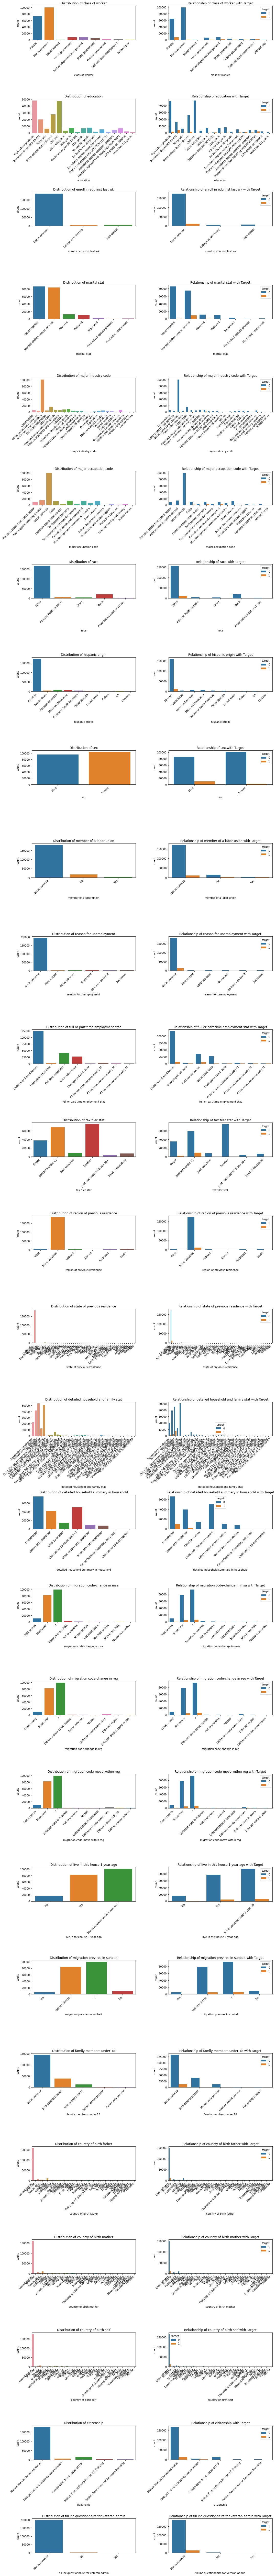

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(categorical_features), 2, figsize=(15, 5 * len(categorical_features)))

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=train_df, ax=axes[i][0])
    axes[i][0].set_title(f'Distribution of {feature}')
    axes[i][0].set_xticklabels(axes[i][0].get_xticklabels(), rotation=45, ha='right')

    sns.countplot(x=feature, hue='target', data=train_df, ax=axes[i][1])
    axes[i][1].set_title(f'Relationship of {feature} with Target')
    axes[i][1].set_xticklabels(axes[i][1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


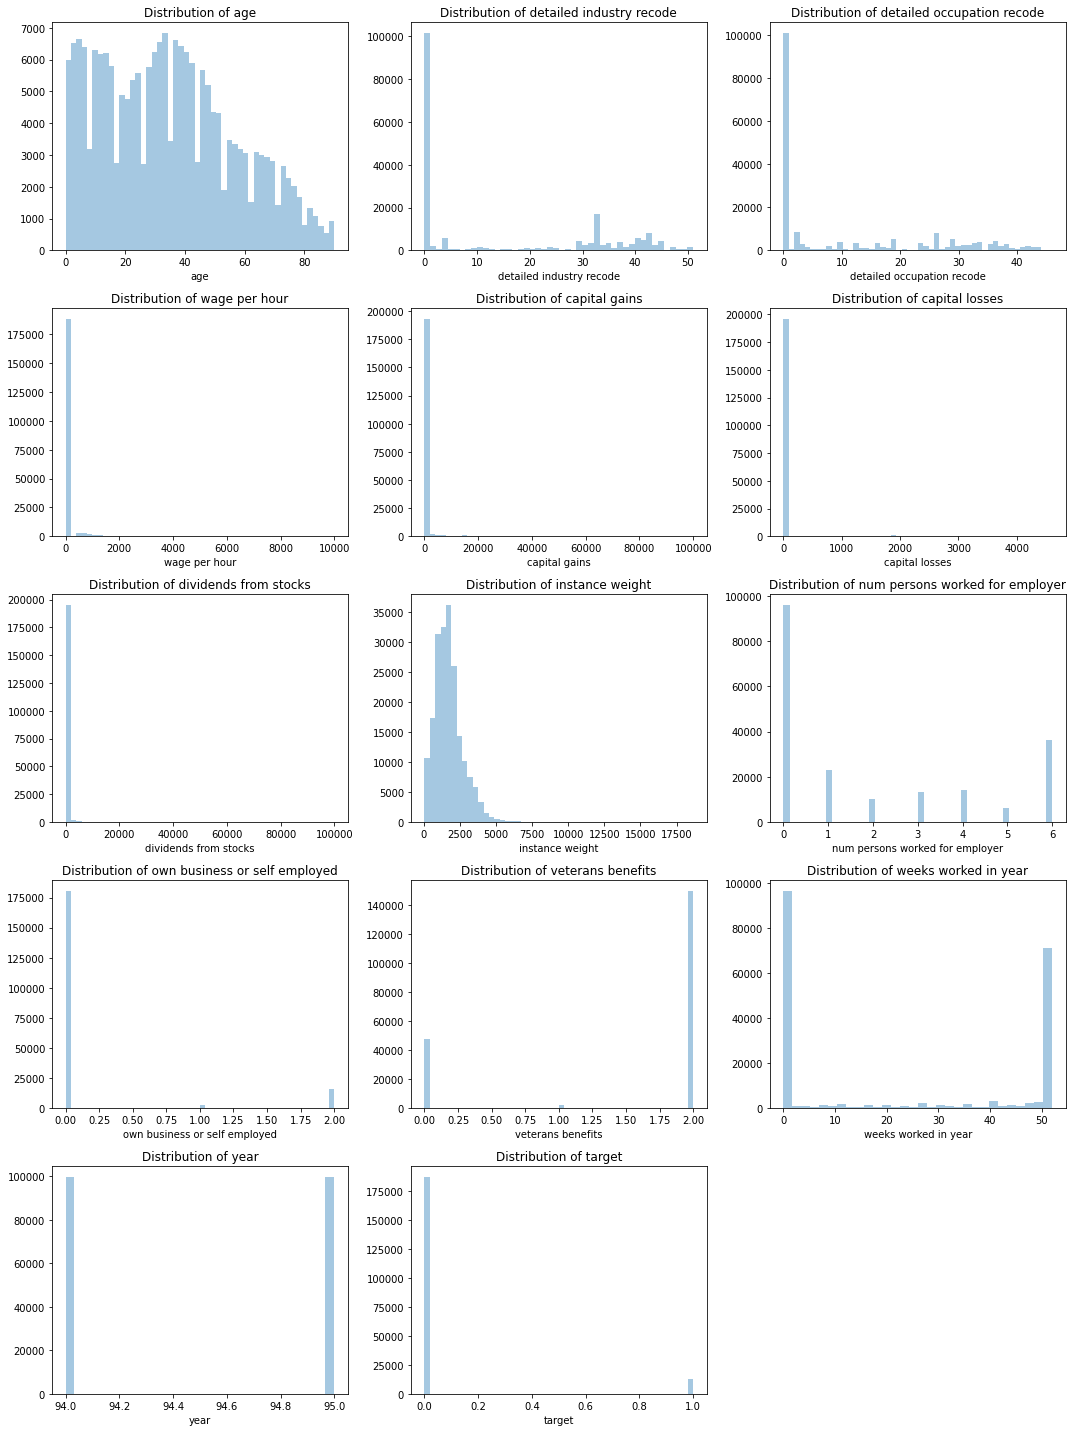

In [27]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 3, i + 1)
    sns.distplot(train_df[feature], kde=False)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [28]:
train_df.select_dtypes('int').nunique()

age                                  91
detailed industry recode             52
detailed occupation recode           47
wage per hour                      1240
capital gains                       132
capital losses                      113
dividends from stocks              1478
num persons worked for employer       7
own business or self employed         3
veterans benefits                     3
weeks worked in year                 53
year                                  2
target                                2
dtype: int64

## Part 2. Data preprocessing.

### 2.1. Fill missing values

Let's check missing values.

In [29]:
missing_values = train_df.isna().sum()
missing_values

age                                         0
class of worker                             0
detailed industry recode                    0
detailed occupation recode                  0
education                                   0
wage per hour                               0
enroll in edu inst last wk                  0
marital stat                                0
major industry code                         0
major occupation code                       0
race                                        0
hispanic origin                             0
sex                                         0
member of a labor union                     0
reason for unemployment                     0
full or part time employment stat           0
capital gains                               0
capital losses                              0
dividends from stocks                       0
tax filer stat                              0
region of previous residence                0
state of previous residence       

there are no missing values at the dataset.

### 2.2. Encode categorical features.

Encoding categorical features is crucial because most machine learning algorithms work better with numerical input. The choice of encoding method depends on the nature of the categorical data and the type of model you plan to use. Here are common methods for encoding categorical features:

1. One-Hot Encoding: This method creates a new binary column for each category in the original feature. It's useful when the categorical variable does not have a clear ordinal relationship and when the number of unique categories is not too high. One-hot encoding can lead to a significant increase in the dataset's dimensionality if a categorical feature has many unique values.

2. Label Encoding: Each unique category is assigned an integer value. This method is simple and does not increase the feature space, but it implies an ordinal relationship between the categories, which may not be present. It's suitable for ordinal data or when using tree-based algorithms.

3. Ordinal Encoding: Similar to label encoding but specifically for ordinal data, where the categories have a known order. The categories are converted into an ordered integer scale according to the ordinal relationship.

4. Binary Encoding: This encodes categories as binary codes. It's more efficient than one-hot encoding when dealing with a high cardinality of categories.

5. Frequency or Count Encoding: Categories are replaced with their frequencies or counts in the dataset. This can be useful when the frequency distribution is informative but can cause issues if the same frequency value occurs for multiple categories.

6. Target Encoding: Categories are replaced with a statistic (like mean) of the target variable for that category. It's particularly useful when there's a strong relationship between the feature and the target, but it can lead to overfitting, especially with small datasets.

For our analysis we can proceed with one-hot encoding for non-ordinal categorical features and label encoding for ordinal ones. This choice is made to avoid implying any unintended ordinal relationship in non-ordinal features and to keep the model interpretable.

In [30]:
from sklearn.preprocessing import LabelEncoder

# create copy to avoid changing original data
label_train_df = train_df.copy()
label_test_df = test_df.copy()

# apply le on categorical feature columns
label_encoder = LabelEncoder()
for col in categorical_features:
    label_train_df[col] = label_encoder.fit_transform(train_df[col])
    label_test_df[col] = label_encoder.transform(test_df[col])



In [31]:
# get_dummies on categorical feature columns
one_hot_encoded_train = pd.get_dummies(train_df, columns=categorical_features)
one_hot_encoded_test = pd.get_dummies(test_df, columns=categorical_features)



In [32]:
# check the shape of dataset now
print('Train Features shape: ', one_hot_encoded_train.shape)
print('Test Features shape: ', one_hot_encoded_test.shape)

Train Features shape:  (199523, 410)
Test Features shape:  (99762, 409)


In [33]:
one_hot_encoded_train.head(5)

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,target,class of worker_ Federal government,class of worker_ Local government,class of worker_ Never worked,class of worker_ Not in universe,class of worker_ Private,class of worker_ Self-employed-incorporated,class of worker_ Self-employed-not incorporated,class of worker_ State government,class of worker_ Without pay,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Less than 1st grade,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,enroll in edu inst last wk_ College or university,enroll in edu inst last wk_ High school,enroll in edu inst last wk_ Not in universe,marital stat_ Divorced,marital stat_ Married-A F spouse present,marital stat_ Married-civilian spouse present,marital stat_ Married-spouse absent,marital stat_ Never married,marital stat_ Separated,marital stat_ Widowed,major industry code_ Agriculture,major industry code_ Armed Forces,major industry code_ Business and repair services,major industry code_ Communications,major industry code_ Construction,major industry code_ Education,major industry code_ Entertainment,major industry code_ Finance insurance and real estate,major industry code_ Forestry and fisheries,major industry code_ Hospital services,major industry code_ Manufacturing-durable goods,major industry code_ Manufacturing-nondurable goods,major industry code_ Medical except hospital,major industry code_ Mining,major industry code_ Not in universe or children,major industry code_ Other professional services,major industry code_ Personal services except private HH,major industry code_ Private household services,major industry code_ Public administration,major industry code_ Retail trade,major industry code_ Social services,major industry code_ Transportation,major industry code_ Utilities and sanitary services,major industry code_ Wholesale trade,major occupation code_ Adm support including clerical,major occupation code_ Armed Forces,major occupation code_ Executive admin and managerial,major occupation code_ Farming forestry and fishing,major occupation code_ Handlers equip cleaners etc,major occupation code_ Machine operators assmblrs & inspctrs,major occupation code_ Not in universe,major occupation code_ Other service,major occupation code_ Precision production craft & repair,major occupation code_ Private household services,major occupation code_ Professional specialty,major occupation code_ Protective services,major occupation code_ Sales,major occupation code_ Technicians and related support,major occupation code_ Transportation and material moving,race_ Amer Indian Aleut or Eskimo,race_ Asian or Pacific Islander,race_ Black,race_ Other,race_ White,hispanic origin_ All other,hispanic origin_ Central or South American,hispanic origin_ Chicano,hispanic origin_ Cuban,hispanic origin_ Do not know,hispanic origin_ Mexican (Mexicano),hispanic origin_ Mexican-American,hispanic origin_ NA,hispanic origin_ Other Spanish,hispanic origin_ Puerto Rican,sex_ Female,sex_ Male,member of a labor union_ No,member of a labor union_ Not in universe,member of a labor union_ Yes,reason for unemployment_ Job leaver,reason for unemployment_ Job loser - on layoff,reason for unemployment_ New entrant,reason for unemployment_ Not in universe,reason for unemployment_ Other job loser,reason for unemployment_ Re-entrant,full or part

In [34]:
one_hot_encoded_train.dtypes

age                                                          int64
detailed industry recode                                     int64
detailed occupation recode                                   int64
wage per hour                                                int64
capital gains                                                int64
                                                             ...  
citizenship_ Native- Born in Puerto Rico or U S Outlying      bool
citizenship_ Native- Born in the United States                bool
fill inc questionnaire for veteran admin_ No                  bool
fill inc questionnaire for veteran admin_ Not in universe     bool
fill inc questionnaire for veteran admin_ Yes                 bool
Length: 410, dtype: object

### 2.3. Cluster observations and add cluster number as one of the features. 

In [35]:
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the data first
scaler = StandardScaler()
X_scale = scaler.fit_transform(one_hot_encoded_train)

In [37]:
#pip install threadpoolctl==3.1.0

  0%|                                                                                           | 0/24 [00:00<?, ?it/s]C:\Users\Alexander\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  4%|███▍                                                                               | 1/24 [00:02<00:55,  2.40s/it]C:\Users\Alexander\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  8%|██████▉                                                                            | 2/24 [00:08<01:41,  4.61s/it]C:\Users\Alexander\AppData\Roaming\Python\Python3

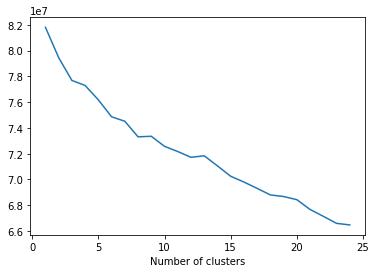

In [51]:
def run_elbow_check(X):
    sse = {}
    for k in tqdm(range(1, 25)):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
        sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of clusters")
    plt.show()
    
run_elbow_check(X_scale)


In [52]:
clusterer = KMeans(n_clusters=23, random_state=10)
cluster_labels = clusterer.fit_predict(X_scale)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scale)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])




C:\Users\Alexander\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


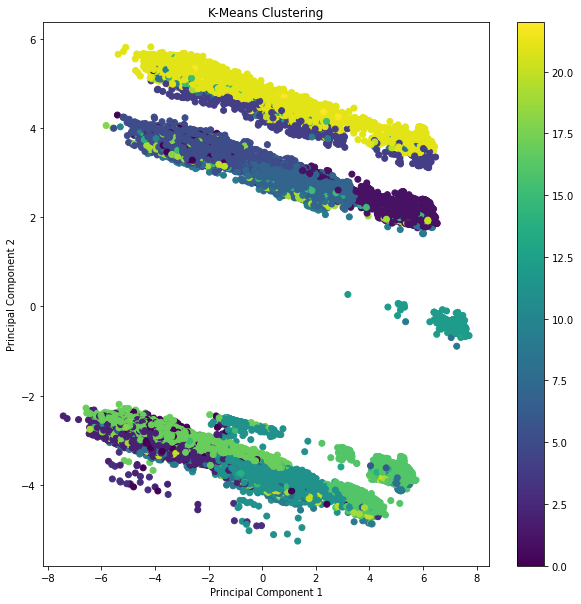

In [53]:
# Plot the clusters obtained using k means
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
                        c=cluster_labels, cmap='viridis')
ax.set_title('K-Means Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()


In [56]:
# Get cluster label as a feature
one_hot_encoded_train['cluster_num'] = clusterer.predict(X_scale)

# Add cluster_num as a categorical feature
categorical_features.append('cluster_num')

In [57]:
pca90 = PCA(n_components=0.95)
pca90.fit_transform(X_scale).shape

(199523, 257)